Enter the bit stream (e.g., 101011): 011000101


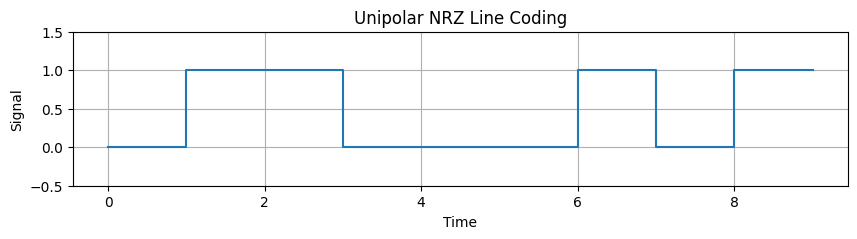

In [ ]:
import matplotlib.pyplot as plt

def unipolar_nrz(bit_stream):
    # Prepare the time and signal lists
    time = []
    signal = []

    # Initial time
    t = 0

    for bit in bit_stream:
        # Append the current time
        time.append(t)
        signal.append(int(bit))

        # Move time forward
        t += 1
        time.append(t)
        signal.append(int(bit))

    # Plot the results
    plt.figure(figsize=(10, 2))
    plt.step(time, signal, where='post')
    plt.ylim(-0.5, 1.5)
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.title('Unipolar NRZ Line Coding')
    plt.grid(True)
    plt.show()

# Example usage
bit_stream = input("Enter the bit stream (e.g., 101011): ")
unipolar_nrz(bit_stream)

Enter the bit stream (e.g., 101011): 011000101


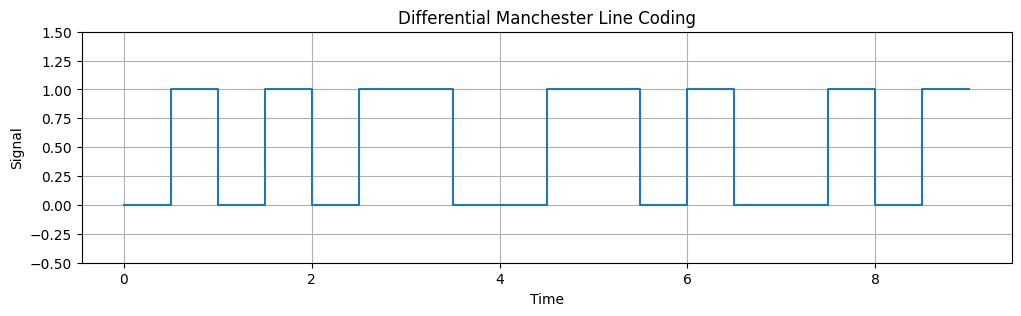

In [ ]:
import matplotlib.pyplot as plt

def differential_manchester(bit_stream):
    # Prepare the time and signal lists
    time = []
    signal = []

    # Initial state
    current_level = 0
    t = 0

    for bit in bit_stream:
        # Differential Manchester coding logic
        if bit == '0':
            time.append(t)
            signal.append(current_level)
            t += 0.5
            time.append(t)
            signal.append(current_level)
            current_level = 1 - current_level
            time.append(t)
            signal.append(current_level)
            t += 0.5
            time.append(t)
            signal.append(current_level)
        else:
            current_level = 1 - current_level
            time.append(t)
            signal.append(current_level)
            t += 0.5
            time.append(t)
            signal.append(current_level)
            current_level = 1 - current_level
            time.append(t)
            signal.append(current_level)
            t += 0.5
            time.append(t)
            signal.append(current_level)

    # Plot the results
    plt.figure(figsize=(12, 3))
    plt.step(time, signal, where='post')
    plt.ylim(-0.5, 1.5)
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.title('Differential Manchester Line Coding')
    plt.grid(True)
    plt.show()

# Example usage
bit_stream = input("Enter the bit stream (e.g., 101011): ")
differential_manchester(bit_stream)


Enter the bit stream (e.g., 101011): 1010110100


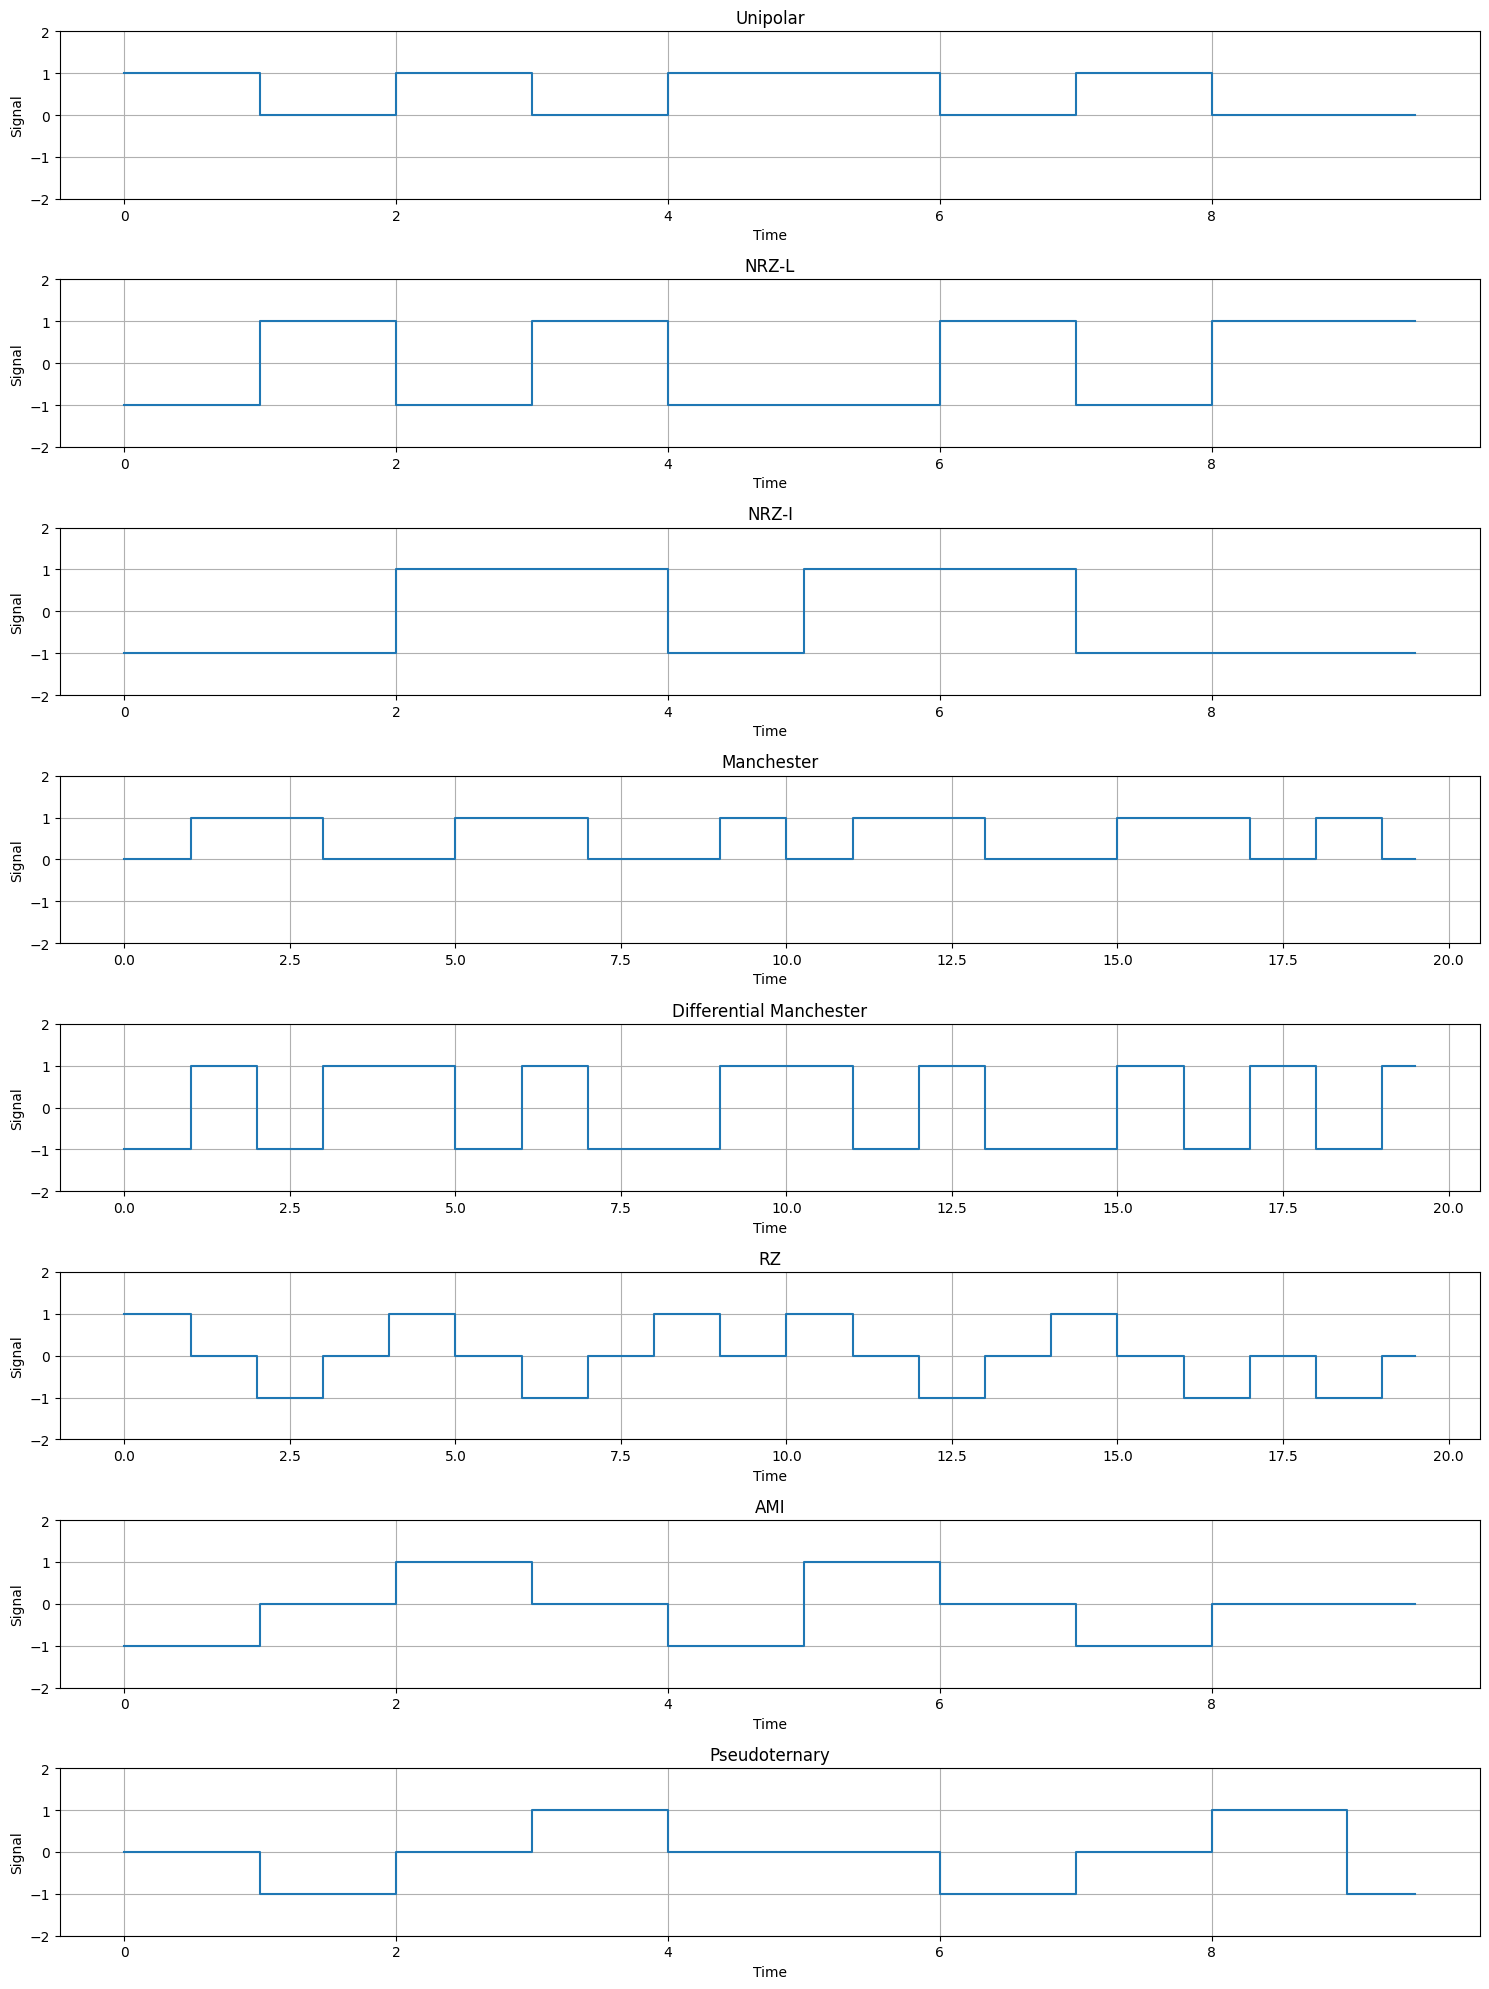

In [ ]:
import matplotlib.pyplot as plt

def unipolar(bit_stream):
    return [int(bit) for bit in bit_stream]

def nrzL(bit_stream):
    return [1 if bit == '0' else -1 for bit in bit_stream]

def nrzI(bit_stream):
    nrzI = []
    current_level = 1
    for bit in bit_stream:
        if bit == '1':
            current_level *= -1
        nrzI.append(current_level)
    return nrzI

def manchester(bit_stream):
    man = []
    for bit in bit_stream:
        if bit == '0':
            man.extend([1, 0])
        else:
            man.extend([0, 1])
    return man

def differential_manchester(bit_stream):
    dman = []
    current_level = 1
    for bit in bit_stream:
        if bit == '0':
            dman.extend([current_level, -current_level])
        else:
            current_level *= -1
            dman.extend([current_level, -current_level])
    return dman

def rz(bit_stream):
    rz = []
    for bit in bit_stream:
        if bit == '0':
            rz.extend([-1, 0])
        else:
            rz.extend([1, 0])
    return rz

def ami(bit_stream):
    ami = []
    current_level = 1
    for bit in bit_stream:
        if bit == '1':
            current_level *= -1
            ami.append(current_level)
        else:
            ami.append(0)
    return ami

def pse(bit_stream):
    pse = []
    current_level = 1
    for bit in bit_stream:
        if bit == '0':
            current_level *= -1
            pse.append(current_level)
        else:
            pse.append(0)
    return pse

def plot_line_codes(bit_stream):
    line_codes = {
        "Unipolar": unipolar(bit_stream),
        "NRZ-L": nrzL(bit_stream),
        "NRZ-I": nrzI(bit_stream),
        "Manchester": manchester(bit_stream),
        "Differential Manchester": differential_manchester(bit_stream),
        "RZ": rz(bit_stream),
        "AMI": ami(bit_stream),
        "Pseudoternary": pse(bit_stream)
    }

    plt.figure(figsize=(15, 20))

    for i, (name, code) in enumerate(line_codes.items(), 1):
        time = [0.5 * j for j in range(len(code) * 2)]
        signal = []
        for bit in code:
            signal.extend([bit, bit])
        plt.subplot(len(line_codes), 1, i)
        plt.step(time, signal, where='post')
        plt.ylim(-2, 2)
        plt.title(name)
        plt.xlabel('Time')
        plt.ylabel('Signal')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage
bit_stream = input("Enter the bit stream (e.g., 101011): ")
plot_line_codes(bit_stream)
